<a href="https://colab.research.google.com/github/RaihanRifat222/Retail-Data-Analysis/blob/main/Retail_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
!ls /content/drive/MyDrive/Retail_Data

Retail_Transactions_Dataset.csv


In [10]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Retail_Data/Retail_Transactions_Dataset.csv')

In [11]:
df.head()

,Transaction_ID,Date,Customer_Name,Product,Total_Items,Total_Cost,Payment_Method,City,Store_Type,Discount_Applied,Customer_Category,Season,Promotion
0,1000000000,2022-01-21 06:27:29,Stacey Price,"['Ketchup', 'Shaving Cream', 'Light Bulbs']",3,71.65,Mobile Payment,Los Angeles,Warehouse Club,True,Homemaker,Winter,NaN
1,1000000001,2023-03-01 13:01:21,Michelle Carlson,"['Ice Cream', 'Milk', 'Olive Oil', 'Bread', 'P...",2,25.93,Cash,San Francisco,Specialty Store,True,Professional,Fall,BOGO (Buy One Get One)
2,1000000002,2024-03-21 15:37:04,Lisa Graves,['Spinach'],6,41.49,Credit Card,Houston,Department Store,True,Professional,Winter,NaN
3,1000000003,2020-10-31 09:59:47,Mrs. Patricia May,"['Tissues', 'Mustard']",1,39.34,Mobile Payment,Chicago,Pharmacy,True,Homemaker,Spring,NaN
4,1000000004,2020-12-10 00:59:59,Susan Mitchell,['Dish Soap'],10,16.42,Debit Card,Houston,Specialty Store,False,Young Adult,Winter,Discount on Selected Items


In [14]:
len(df.columns)

13

In [15]:
df.columns = df.columns.str.lower()
display(df.head())

,transaction_id,date,customer_name,product,total_items,total_cost,payment_method,city,store_type,discount_applied,customer_category,season,promotion
0,1000000000,2022-01-21 06:27:29,Stacey Price,"['Ketchup', 'Shaving Cream', 'Light Bulbs']",3,71.65,Mobile Payment,Los Angeles,Warehouse Club,True,Homemaker,Winter,NaN
1,1000000001,2023-03-01 13:01:21,Michelle Carlson,"['Ice Cream', 'Milk', 'Olive Oil', 'Bread', 'P...",2,25.93,Cash,San Francisco,Specialty Store,True,Professional,Fall,BOGO (Buy One Get One)
2,1000000002,2024-03-21 15:37:04,Lisa Graves,['Spinach'],6,41.49,Credit Card,Houston,Department Store,True,Professional,Winter,NaN
3,1000000003,2020-10-31 09:59:47,Mrs. Patricia May,"['Tissues', 'Mustard']",1,39.34,Mobile Payment,Chicago,Pharmacy,True,Homemaker,Spring,NaN
4,1000000004,2020-12-10 00:59:59,Susan Mitchell,['Dish Soap'],10,16.42,Debit Card,Houston,Specialty Store,False,Young Adult,Winter,Discount on Selected Items


In [16]:
df.columns

Index(['transaction_id', 'date', 'customer_name', 'product', 'total_items',
       'total_cost', 'payment_method', 'city', 'store_type',
       'discount_applied', 'customer_category', 'season', 'promotion'],
      dtype='object')

In [18]:
print(df['date'].dtype)
display(df['date'].head())

object


,date
0,2022-01-21 06:27:29
1,2023-03-01 13:01:21
2,2024-03-21 15:37:04
3,2020-10-31 09:59:47
4,2020-12-10 00:59:59


In [19]:
df['date'] = pd.to_datetime(df['date'])
print(df['date'].dtype)
display(df['date'].head())

datetime64[ns]


,date
0,2022-01-21 06:27:29
1,2023-03-01 13:01:21
2,2024-03-21 15:37:04
3,2020-10-31 09:59:47
4,2020-12-10 00:59:59


In [21]:
print(df.select_dtypes(include=['number']).dtypes)

transaction_id      int64
total_items         int64
total_cost        float64
dtype: object


In [23]:
df['discount_applied']= df['discount_applied'].astype(str).str.lower()
df.head()

,transaction_id,date,customer_name,product,total_items,total_cost,payment_method,city,store_type,discount_applied,customer_category,season,promotion
0,1000000000,2022-01-21 06:27:29,Stacey Price,"['Ketchup', 'Shaving Cream', 'Light Bulbs']",3,71.65,Mobile Payment,Los Angeles,Warehouse Club,true,Homemaker,Winter,NaN
1,1000000001,2023-03-01 13:01:21,Michelle Carlson,"['Ice Cream', 'Milk', 'Olive Oil', 'Bread', 'P...",2,25.93,Cash,San Francisco,Specialty Store,true,Professional,Fall,BOGO (Buy One Get One)
2,1000000002,2024-03-21 15:37:04,Lisa Graves,['Spinach'],6,41.49,Credit Card,Houston,Department Store,true,Professional,Winter,NaN
3,1000000003,2020-10-31 09:59:47,Mrs. Patricia May,"['Tissues', 'Mustard']",1,39.34,Mobile Payment,Chicago,Pharmacy,true,Homemaker,Spring,NaN
4,1000000004,2020-12-10 00:59:59,Susan Mitchell,['Dish Soap'],10,16.42,Debit Card,Houston,Specialty Store,false,Young Adult,Winter,Discount on Selected Items


In [25]:
df['discount_applied'] = df['discount_applied'] == 'true'
print(df['discount_applied'].dtype)
display(df.head())

bool


,transaction_id,date,customer_name,product,total_items,total_cost,payment_method,city,store_type,discount_applied,customer_category,season,promotion
0,1000000000,2022-01-21 06:27:29,Stacey Price,"['Ketchup', 'Shaving Cream', 'Light Bulbs']",3,71.65,Mobile Payment,Los Angeles,Warehouse Club,True,Homemaker,Winter,NaN
1,1000000001,2023-03-01 13:01:21,Michelle Carlson,"['Ice Cream', 'Milk', 'Olive Oil', 'Bread', 'P...",2,25.93,Cash,San Francisco,Specialty Store,True,Professional,Fall,BOGO (Buy One Get One)
2,1000000002,2024-03-21 15:37:04,Lisa Graves,['Spinach'],6,41.49,Credit Card,Houston,Department Store,True,Professional,Winter,NaN
3,1000000003,2020-10-31 09:59:47,Mrs. Patricia May,"['Tissues', 'Mustard']",1,39.34,Mobile Payment,Chicago,Pharmacy,True,Homemaker,Spring,NaN
4,1000000004,2020-12-10 00:59:59,Susan Mitchell,['Dish Soap'],10,16.42,Debit Card,Houston,Specialty Store,False,Young Adult,Winter,Discount on Selected Items


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 13 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   transaction_id     1000000 non-null  int64         
 1   date               1000000 non-null  datetime64[ns]
 2   customer_name      1000000 non-null  object        
 3   product            1000000 non-null  object        
 4   total_items        1000000 non-null  int64         
 5   total_cost         1000000 non-null  float64       
 6   payment_method     1000000 non-null  object        
 7   city               1000000 non-null  object        
 8   store_type         1000000 non-null  object        
 9   discount_applied   1000000 non-null  bool          
 10  customer_category  1000000 non-null  object        
 11  season             1000000 non-null  object        
 12  promotion          666057 non-null   object        
dtypes: bool(1), datetime64[ns](1

In [31]:
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df['weekday'] = df['date'].dt.day_name()
df['revenue_per_item'] = df['total_cost']/ df['total_items']
df['promotion'] = df['promotion'].fillna('No Promotion')

In [33]:
df.head()

,transaction_id,date,customer_name,product,total_items,total_cost,payment_method,city,store_type,discount_applied,customer_category,season,promotion,month,year,weekday,revenue_per_item
0,1000000000,2022-01-21 06:27:29,Stacey Price,"['Ketchup', 'Shaving Cream', 'Light Bulbs']",3,71.65,Mobile Payment,Los Angeles,Warehouse Club,True,Homemaker,Winter,No Promotion,1,2022,Friday,23.883333
1,1000000001,2023-03-01 13:01:21,Michelle Carlson,"['Ice Cream', 'Milk', 'Olive Oil', 'Bread', 'P...",2,25.93,Cash,San Francisco,Specialty Store,True,Professional,Fall,BOGO (Buy One Get One),3,2023,Wednesday,12.965000
2,1000000002,2024-03-21 15:37:04,Lisa Graves,['Spinach'],6,41.49,Credit Card,Houston,Department Store,True,Professional,Winter,No Promotion,3,2024,Thursday,6.915000
3,1000000003,2020-10-31 09:59:47,Mrs. Patricia May,"['Tissues', 'Mustard']",1,39.34,Mobile Payment,Chicago,Pharmacy,True,Homemaker,Spring,No Promotion,10,2020,Saturday,39.340000
4,1000000004,2020-12-10 00:59:59,Susan Mitchell,['Dish Soap'],10,16.42,Debit Card,Houston,Specialty Store,False,Young Adult,Winter,Discount on Selected Items,12,2020,Thursday,1.642000


## Exploratory Data Analysis (EDA)

### 1. Revenue Over Time
### 2. Sales by Season
### 3. Sales by Store Type
### 4. Top Cities by Revenue
### 5. Top Selling Products
### 6. Payment Method Patterns
### 7. Promotion Impact
### 8. Customer Category Insights


In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.rcParams['figure.figsize'] = (12,6)

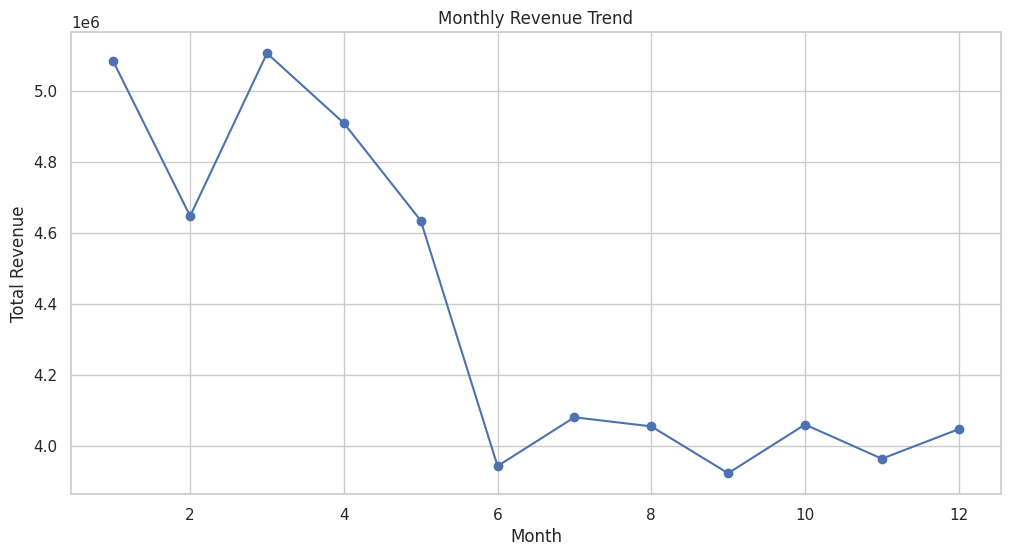

In [41]:
monthly_revenue = df.groupby('month')['total_cost'].sum().reset_index()

monthly_revenue = monthly_revenue.sort_values('month')

plt.plot(monthly_revenue['month'], monthly_revenue['total_cost'], marker='o')

plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.show()



/tmp/ipython-input-1356871075.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = seasonal_revenue, x= 'season', y = 'total_cost', palette = 'Blues_d')


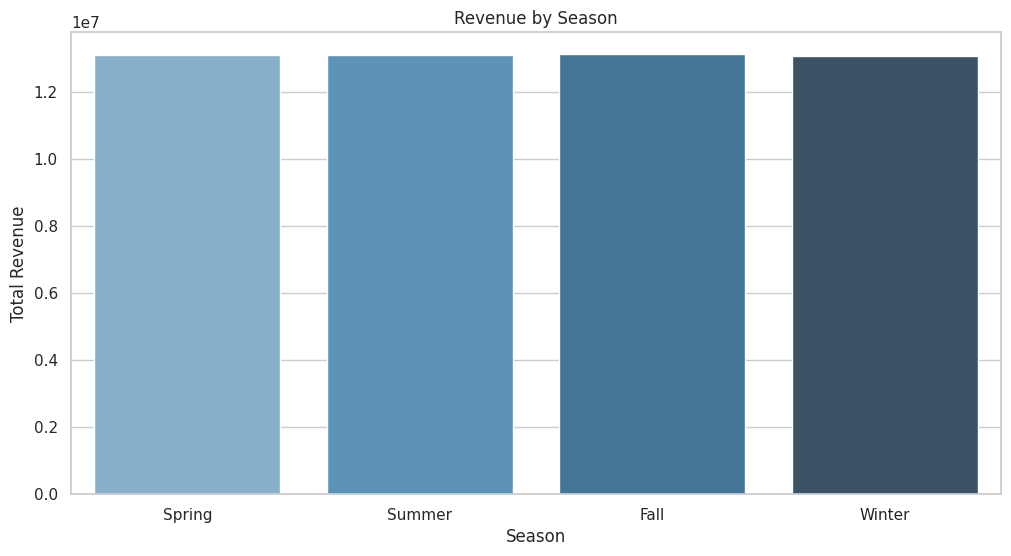

In [46]:
seasonal_revenue = df.groupby('season')['total_cost'].sum().reset_index()
season_order = ['Spring', 'Summer', 'Fall', 'Winter']
seasonal_revenue['season'] = pd.Categorical(seasonal_revenue['season'], categories = season_order, ordered= True)
seasonal_revenue = seasonal_revenue.sort_values('season')

sns.barplot(data = seasonal_revenue, x= 'season', y = 'total_cost', palette = 'Blues_d')

plt.title('Revenue by Season')
plt.xlabel('Season')
plt.ylabel('Total Revenue')
plt.show()

/tmp/ipython-input-2880048427.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= storewise_revenue,  x = 'store_type', y = 'total_cost', palette = 'Blues_d')


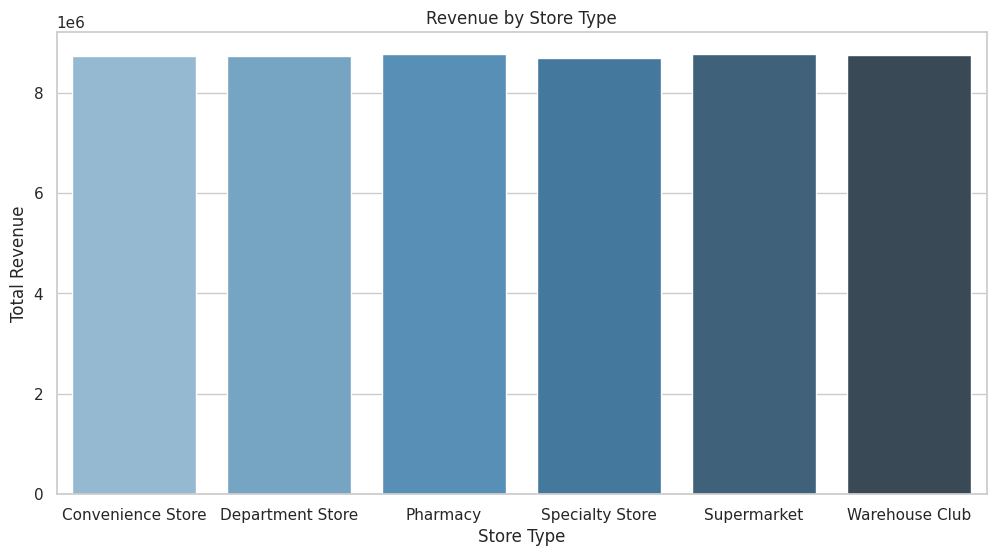

In [49]:
storewise_revenue=  df.groupby('store_type')['total_cost'].sum().reset_index()
storewise_revenue = storewise_revenue.sort_values('store_type')
sns.barplot(data= storewise_revenue,  x = 'store_type', y = 'total_cost', palette = 'Blues_d')
plt.title('Revenue by Store Type')
plt.xlabel('Store Type')
plt.ylabel('Total Revenue')
plt.show()